
# Data Science do Zero
códigos: [Data Science from Scratch](https://github.com/joelgrus/data-science-from-scratch)
Um cientista de dados é alguém que extrai conhecimento de dados desorganizados.
* Encontrar os conectores-chave
  * Lista de cientistas de dados
  * Dicionário contendo um `id` para cada usuário
  * Contém um `name`
  * Lista de amizades com pares de `id's`
* Competência significativa


In [39]:
# lista de usuários
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

In [40]:
# lista de amizades
friendships = [
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (8, 9),
]

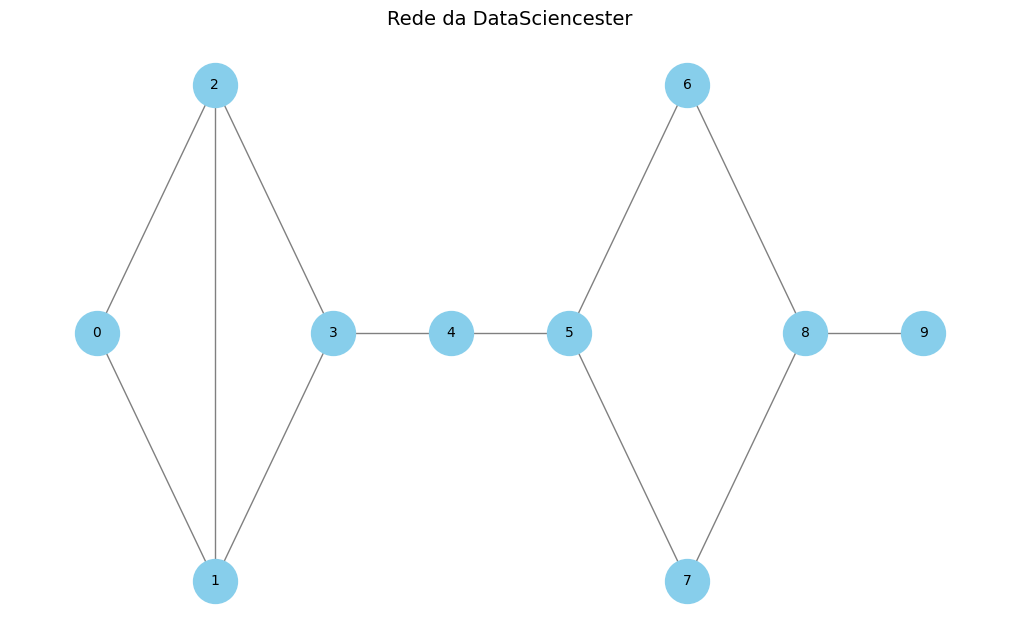

In [41]:
# Gráfico com as conexões entre os cientistas
import matplotlib.pyplot as plt
import networkx as nx

## Criando o grafo
G = nx.Graph()
G.add_edges_from(friendships)

# Coordenadas manuais para os nós
pos = {
    0: (0, 2),
    1: (1, 1),
    2: (1, 3),
    3: (2, 2),
    4: (3, 2),
    5: (4, 2),
    6: (5, 3),
    7: (5, 1),
    8: (6, 2),
    9: (7, 2),
}

# Plotando o grafo
plt.figure(figsize=(10, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="skyblue",
    node_size=1000,
    font_size=10,
    edge_color="gray",
)
plt.title("Rede da DataSciencester", fontsize=14)
plt.show()

In [42]:
# adicionada a propriedade para os amigos de cada usuário
for user in users:
  user["friends"] = []

In [43]:
# Percorrendo a lista de amizades para recuperar a lista de amigos de cada usuário
for i, j in friendships:
  # isso funciona porque users[i] é o usuário cuja id é i
  users[i]["friends"].append(users[j]) # adiciona i como um amigo de 
  users[j]["friends"].append(users[i]) # adiciona j como um amigo de i

In [44]:
# numero total de conexões e quanto amigos cada usuário possui
def number_of_friends(user):
  """quantos amigos o usuário tem?"""
  return len(user["friends"]) # tamanho da lista friend_ids
  
total_connections = sum(number_of_friends(user) for user in users) # 24

In [45]:
# numero médio de amigos de cada usuário
num_users = len(users) # tamanho da lista de usuários
avg_connections = total_connections / num_users # 2.4

In [46]:
# lista com a quantidade de amigos que cada usuário possui

# cria uma lista (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

# Ordena pela quantidade de amigos, do maior para o menor
sorted_num_friends = sorted(
    num_friends_by_id,
    key=lambda user_tuple: user_tuple[1],  # Acessa o segundo elemento da tupla
    reverse=True,
)
# cada par é (user_id, num_friends)
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

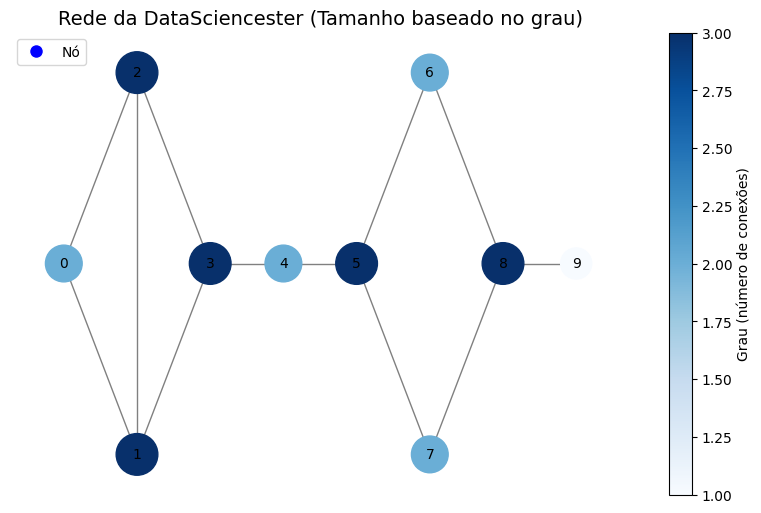

In [47]:
# Gráfico que mostra rede ordenada pelo grau - rede métrica de grau de centralidad
import matplotlib.pyplot as plt
import networkx as nx

# Calcula o grau (número de conexões) de cada nó
node_degrees = dict(G.degree())

# Define o tamanho dos nós proporcional ao grau (escalar para melhor visualização)
node_sizes = [300 + degree * 200 for degree in node_degrees.values()]

# Define a cor dos nós baseada no grau (opcional, para destaque visual)
node_colors = list(node_degrees.values())

# Criar o mapa de cores com limites apropriados
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para evitar warnings

# Criar uma figura e eixos explicitamente
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o grafo no Axes
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.Blues,  # Mapa de cores
    font_size=10,
    edge_color="gray",
)
ax.set_title("Rede da DataSciencester (Tamanho baseado no grau)", fontsize=14)
ax.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Nó')],
    loc="upper left",
    fontsize=10,
    frameon=True,
)

# Adicionando a barra de cores explicitamente no mesmo Axes
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Grau (número de conexões)")

plt.show()


In [48]:
def friends_of_friend_ids_bad(user):
  # “foaf” é abreviação de “friend of a friend”
  return [foaf["id"]
    for friend in user["friends"] # para cada amigo de usuário
    for foaf in friend["friends"]] # pega cada _their_friends

In [49]:
# lista de usuário amigos de amigos e sua contagem
from collections import Counter
def not_the_same(user, other_user):
  """dois usuários não são os mesmos se possuem ids diferentes"""
  return user["id"] != other_user["id"]
def not_friends(user, other_user):
  """other_user não é um amigo se não está em user[“friends”];
  isso é, se é not_the_same com todas as pessoas em user[“friends”]"""
  return all(not_the_same(friend, other_user)
    for friend in user["friends"])
def friends_of_friend_ids(user):
  return Counter(foaf["id"]
    for friend in user["friends"] # para cada um dos meus amigos
  for foaf in friend["friends"] # que contam *their* amigos
    if not_the_same(user, foaf) # que não sejam eu
    and not_friends(user, foaf)) # e que não são meus amigos
print(friends_of_friend_ids(users[3]) ) # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [ ]:
# interesse em comum entre os usuários
interests = [
    (0, "Hadoop"),
    (0, "Big Data"),
    (0, "HBase"),
    (0, "Java"),
    (0, "Spark"),
    (0, "Storm"),
    (0, "Cassandra"),
    (1, "NoSQL"),
    (1, "MongoDB"),
    (1, "Cassandra"),
    (1, "HBase"),
    (1, "Postgres"),
    (2, "Python"),
    (2, "scikit-learn"),
    (2, "scipy"),
    (2, "numpy"),
    (2, "statsmodels"),
    (2, "pandas"),
    (3, "R"),
    (3, "Python"),
    (3, "statistics"),
    (3, "regression"),
    (3, "probability"),
    (4, "machine learning"),
    (4, "regression"),
    (4, "decision trees"),
    (4, "libsvm"),
    (5, "Python"),
    (5, "R"),
    (5, "Java"),
    (5, "C++"),
    (5, "Haskell"),
    (5, "programming languages"),
    (6, "statistics"),
    (6, "probability"),
    (6, "mathematics"),
    (6, "theory"),
    (7, "machine learning"),
    (7, "scikit-learn"),
    (7, "Mahout"),
    (7, "neural networks"),
    (8, "neural networks"),
    (8, "deep learning"),
    (8, "Big Data"),
    (8, "artificial intelligence"),
    (9, "Hadoop"),
    (9, "Java"),
    (9, "MapReduce"),
    (9, "Big Data"),
]

In [ ]:
def data_scientists_who_like(target_interest):
  return [user_id
    for user_id, user_interest in interests
    if user_interest == target_interest]